# Classification Predict

## Problem statement

Add Problem Statement

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
X_df = pd.read_csv('train.csv')
X_df.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


## Exploratory Data Analysis

In order to give our graphs more context, we have added the text version of the sentiment to the train DataFrame. These new columns will be deleted as they do not assist in the actual classification problem.

In [3]:
# A function to add the text version of 'sentiment'. This is just for graphing purposes
# and should be droped.
def add_text_sent(df):
    # Copy the input DataFrame
    out_df = df.copy()
    
    sentiment_text = []
    
    # Loop though the sentiments and assign the text version. 
    # Pro: 1, News: 2, Neutral: 0, Anti: -1
    for sent in df['sentiment']:
        
        if sent == 1:
            sentiment_text.append('Pro')
            
        elif sent == 2:
            sentiment_text.append('News')
            
        elif sent == 0:
            sentiment_text.append('Neutral')
            
        elif sent == -1:
            sentiment_text.append('Anti')
            
    out_df['sentiment_text'] = sentiment_text
    
    out_df.drop(['message', 'tweetid'], axis = 1, inplace = True)
        
    return out_df

In [4]:
# Function to arrange the DataFrame to show percentage of classes
def class_table(df):
    out_df = df.groupby(['sentiment_text']).count()
    
    class_perc = [round(100 * x / len(df), 1) for x in out_df['sentiment']]
    
    out_df['% of Total Classes'] = class_perc
    
    return out_df

In [5]:
# Create a new DataFrame for graphing purposes. Show the sentiment classes as a 
# percentage.
new_X_df = add_text_sent(X_df)
new_X_df_t = class_table(new_X_df)
new_X_df_t

,sentiment,% of Total Classes
sentiment_text,,
Anti,1296,8.2
Neutral,2353,14.9
News,3640,23.0
Pro,8530,53.9


The class labels of the training data are not balanced. As shown in the table above, most of the tweets (53.9%) are classified as `Pro`, which in the context of the `Problem Statement` means they believe in man-made climate change. The other classes (`News`, `Neutral` and `Anti`) account for `23.0%`, `14.9%` and `8.2%`respectively. This presents a challenge in that the models developed might have a bias in classifying tweets. To further illustrate this distribution, a bar graph of the count of each sentiment class is shown below: 

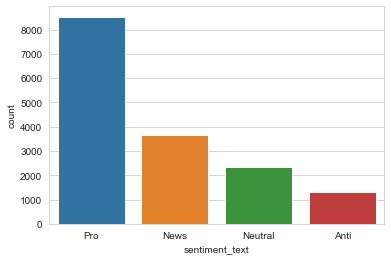

In [6]:
# Show the ditribution of the classes as a graph
ax = sns.countplot(x="sentiment_text", data=new_X_df)

#### Length of Tweets per Sentiment Class 

In [28]:
# Add a column of length of tweets. 
new_X_df['message_length'] = X_df['message'].str.len()
new_X_df.head()

,sentiment,sentiment_text,message_length
0,1,Pro,140
1,1,Pro,62
2,2,News,140
3,1,Pro,99
4,1,Pro,122


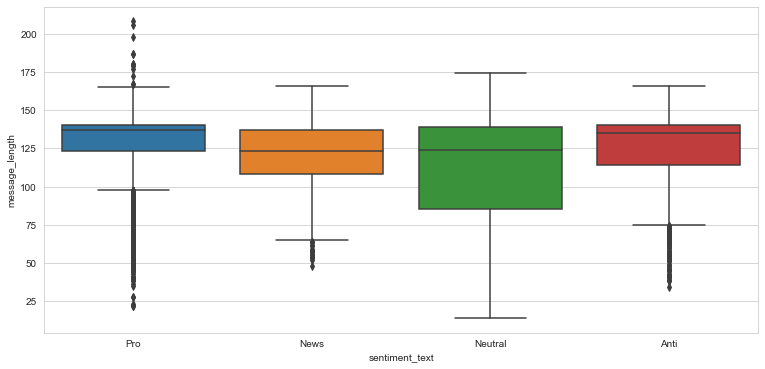

In [8]:
# Display the boxplot of the length of tweets.
plt.figure(figsize=(12.8,6))
sns.boxplot(data=new_X_df, x='sentiment_text', y='message_length');

The Tweets seem to be around `125` characters loong on average. This is shown by both the mean of the classes in the boxplots above and distribution density of the classes below. All the classes have a distribution density centred around `125` characters. 

The length of `Neutral` Tweets seem to have a wider range and `Pro` Tweets have a shorter range. The `Pro` Tweets also seem to have a lot of `outliers` by this measurement.

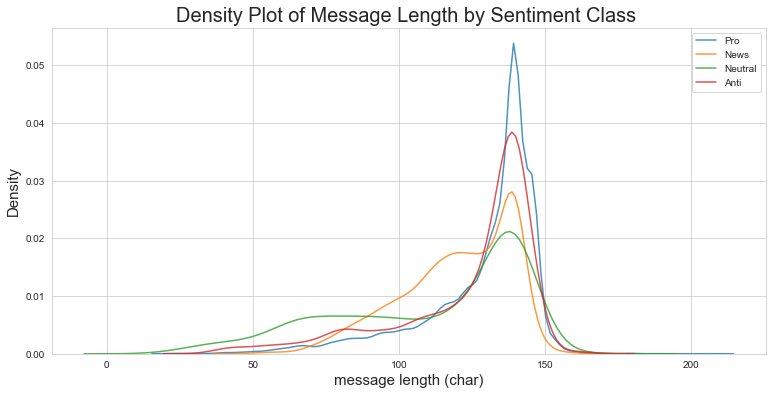

In [27]:

# Plot of distribution of scores for building categories
plt.figure(figsize=(12.8,6))

    
# Density plot of Energy Star scores
sns.kdeplot(new_X_df[new_X_df['sentiment_text'] == 'Pro']['message_length'], label = 'Pro', shade = False, alpha = 0.8);
sns.kdeplot(new_X_df[new_X_df['sentiment_text'] == 'News']['message_length'], label = 'News', shade = False, alpha = 0.8);
sns.kdeplot(new_X_df[new_X_df['sentiment_text'] == 'Neutral']['message_length'], label = 'Neutral', shade = False, alpha = 0.8);
sns.kdeplot(new_X_df[new_X_df['sentiment_text'] == 'Anti']['message_length'], label = 'Anti', shade = False, alpha = 0.8);

# label the plot
plt.xlabel('message length (char)', size = 15); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Message Length by Sentiment Class ', size = 20);

### Data Preprocessing

Do some data cleaning and show the word cloud of the different classes.  

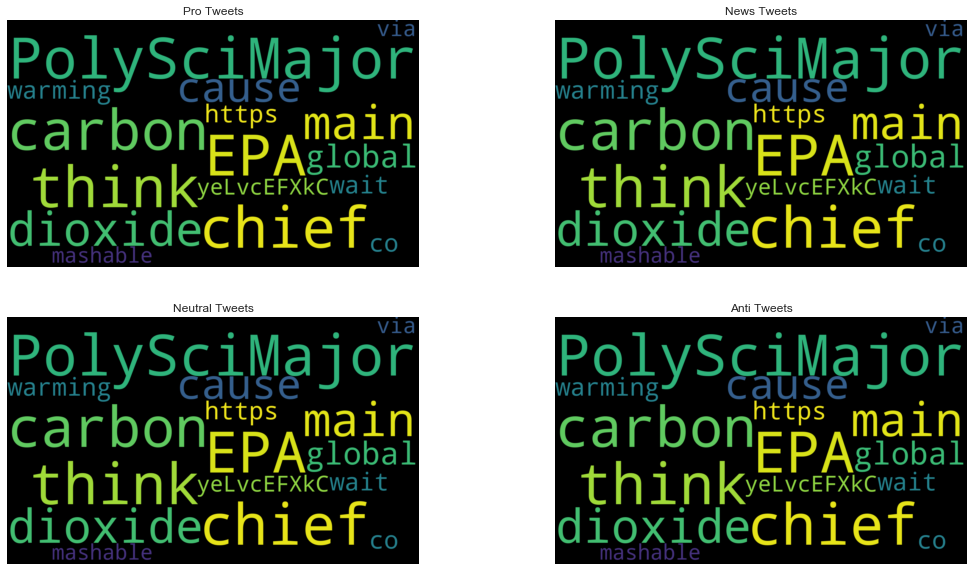

In [133]:
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1500, height = 900).generate(X_df['message'][0])

# Display the generated image:
fig, axs = plt.subplots(2, 2, figsize=(18,10))

axs[0, 0].imshow(wordcloud, interpolation='bilinear')
axs[0, 0].set_title('Pro Tweets')
axs[0, 0].axis('off')
axs[0, 1].imshow(wordcloud, interpolation='bilinear')
axs[0, 1].set_title('News Tweets')
axs[0, 1].axis('off')
axs[1, 0].imshow(wordcloud, interpolation='bilinear')
axs[1, 0].set_title('Neutral Tweets')
axs[1, 0].axis('off')
axs[1, 1].imshow(wordcloud, interpolation='bilinear')
axs[1, 1].set_title('Anti Tweets')
axs[1, 1].axis('off')

plt.show()